### Análisis y Procesamiento de Señales
# TS7: Transformada Z y Respuesta en frecuencia
#### Tatiana Galansky, Guadalupe Cura


### INTRODUCCIÓN TEÓRICA
El análisis de sistemas discretos en el dominio de la frecuencia constituye una herramienta fundamental en el campo del procesamiento digital de señales y el control de sistemas. Este informe presenta un estudio comprehensivo de tres conceptos interrelacionados que forman la base del análisis de sistemas lineales e invariantes en el tiempo (LTI) discretos: la Transformada Z, la función de transferencia y la respuesta en módulo y fase.

La Transformada Z emerge como la contraparte discreta de la Transformada de Laplace, proporcionando un marco matemático robusto para analizar señales y sistemas en el dominio complejo. Esta transformación permite convertir ecuaciones en diferencias, que describen el comportamiento temporal de sistemas discretos, en expresiones algebraicas más manejables en el plano Z complejo.

A partir de la Transformada Z, se deriva el concepto de función de transferencia, que encapsula las características esenciales de un sistema LTI discreto.

 $$T(z)=\frac{Y(z)}{X(z)}      \qquad (1)$$

Esta función, representada como el cociente entre la Transformada Z de la salida y la entrada, proporciona una descripción completa del sistema independiente de las señales específicas aplicadas, revelando propiedades fundamentales como estabilidad, causalidad y respuesta temporal.

Entre los distintos tipos de sistemas discretos que pueden analizarse mediante esta herramienta, uno de los más simples y ampliamente utilizados es el filtro de media móvil. Este tipo de filtro implementa un promedio de un número finito de muestras sucesivas de la señal de entrada, suavizando las variaciones rápidas y reduciendo el contenido de alta frecuencia o ruido. En términos prácticos, el filtro de media móvil actúa como un filtro pasa bajos discreto, ya que atenúa las componentes rápidas o abruptas de la señal, conservando las tendencias más lentas o de baja frecuencia.

Finalmente, la evaluación de la función de transferencia sobre la circunferencia unidad en el plano Z conduce al análisis de la respuesta en frecuencia, desglosada en su módulo (que caracteriza la amplificación o atenuación de componentes frecuenciales) y su fase (que describe los desplazamientos temporales introducidos por el sistema). Esta descomposición permite comprender cómo un sistema modifica las señales que procesa, información crucial para aplicaciones que van desde el diseño de filtros digitales hasta la implementación de sistemas de control.

### ANÁLISIS Y DESARROLLO
Para comenzar con la tarea semanal, se pidió que, mediante la transformada de Z, se encuentre la función transferencia.

Comenzando con la primera ecuación de diferencias: y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)

Se aplicó la transformada Z a ambos lados de la igualdad, para luego despejar la función transferencia según (1)
$$Y(z)=X(z)z^{-3}+X(z)z^{-2}+X(z)z^{-1}+X(z)$$
Despejando, se obtiene la función transferencia
$$T(z)=1+z^{-1}+z^{-2}+z^{-3}$$
Este procedimiento se volvió a repetir para las otras ecuaciones de diferencias, obteniendo los siguientes resultados:

y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)
$$Y(z)=X(z)z^{-4}+X(z)z^{-3}+X(z)z^{-2}+X(z)z^{-1}+X(z)$$
$$T(z)=1+z^{-1}+z^{-2}+z^{-3}+z^{-4}$$

y(n)=x(n)−x(n−1)
$$Y(z)=X(z)-X(z)z^{-1}$$
$$T(z)=1-z^{-1}$$

y(n)=x(n)−x(n−2)
$$Y(z)=X(z)-X(z)z^{-2}$$
$$T(z)=1-z^{-2}$$

A partir de cada ecuación en diferencias se determinó la correspondiente función de transferencia en el dominio z, expresada como $T(z)$. Para obtener la respuesta en frecuencia, se evaluó dicha función sobre el eje unitario del plano z, sustituyendo $z=e^{j\omega}$. Esta operación es equivalente a analizar cómo responde el sistema ante señales sinusoidales complejas de distinta frecuencia angular, lo que permite caracterizar completamente su comportamiento espectral. Una vez reemplazado $z$, se obtuvo la forma explícita de $H(e^{j\omega})$, a partir de la cual se calcularon el módulo $|H(e^{j\omega})|$ y la fase $\angle H(e^{j\omega})$, que describen la ganancia y el desplazamiento de fase introducidos por el sistema para cada frecuencia.

Este procedimiento permitió representar y graficar la respuesta en frecuencia, tanto en módulo como en fase, de cada una de las ecuaciones en diferencias analizadas. Posteriormente, mediante las funciones de la librería signal de scipy, se validó de forma gráfica la correcta obtención de la función de transferencia, comprobando que las respuestas de módulo y fase calculadas analíticamente coinciden con las obtenidas mediante las herramientas de software. Esta verificación confirma el comportamiento teórico esperado de los sistemas y la consistencia entre el análisis matemático y la simulación computacional.

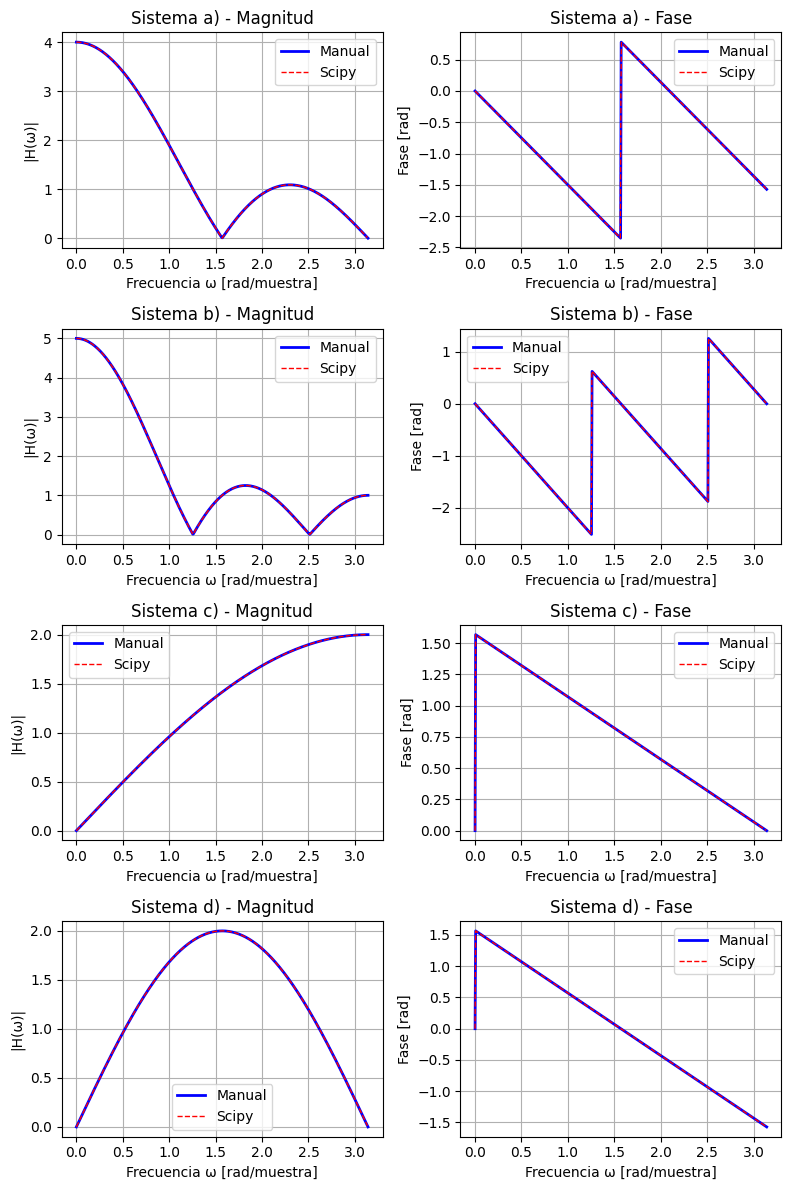

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal



# =============================================================================
# SISTEMA a) y(n) = x(n-3) + x(n-2) + x(n-1) + x(n)
# =============================================================================
plt.figure(figsize=(12,12))
plt.subplot(4, 3, 1)

# Coeficientes
b_a = np.array([1, 1, 1, 1])  # Coeficientes del numerador
a_a = np.array([1])           # Coeficientes del denominador

# cálculo manual
w = np.linspace(0, np.pi, 512)
H_manual_a = np.exp(-1j*w*0)*b_a[0] + np.exp(-1j*w*1)*b_a[1] + np.exp(-1j*w*2)*b_a[2] + np.exp(-1j*w*3)*b_a[3]

# Cálculo con scipy
w_scipy, H_scipy_a = signal.freqz(b_a, a_a, worN=512)

# Comparar módulo
plt.plot(w, np.abs(H_manual_a), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.abs(H_scipy_a), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema a) - Magnitud")
plt.ylabel("|H(ω)|")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

plt.subplot(4, 3, 2)
# Comparar fase
plt.plot(w, np.angle(H_manual_a), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.angle(H_scipy_a), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema a) - Fase")
plt.ylabel("Fase [rad]")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()


# =============================================================================
# SISTEMA b) y(n) = x(n-4) + x(n-3) + x(n-2) + x(n-1) + x(n)
# =============================================================================
plt.subplot(4, 3, 4)

# Coeficientes 
b_b = np.array([1, 1, 1, 1, 1])  # Coeficientes correctos
a_b = np.array([1])

# cálculo manual
H_manual_b = (np.exp(-1j*w*0)*b_b[0] + np.exp(-1j*w*1)*b_b[1] + 
              np.exp(-1j*w*2)*b_b[2] + np.exp(-1j*w*3)*b_b[3] + 
              np.exp(-1j*w*4)*b_b[4])

# Cálculo con scipy
w_scipy, H_scipy_b = signal.freqz(b_b, a_b, worN=512)

# Comparar módulo
plt.plot(w, np.abs(H_manual_b), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.abs(H_scipy_b), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema b) - Magnitud")
plt.ylabel("|H(ω)|")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

plt.subplot(4, 3, 5)
# Comparar fase
plt.plot(w, np.angle(H_manual_b), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.angle(H_scipy_b), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema b) - Fase")
plt.ylabel("Fase [rad]")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

# =============================================================================
# SISTEMA c) y(n) = x(n) - x(n-1)
# =============================================================================
plt.subplot(4, 3, 7)

# Coeficientes
b_c = np.array([1, -1])  # NOTA: el segundo coeficiente es -1
a_c = np.array([1])

# cálculo manual
H_manual_c = np.exp(-1j*w*0)*b_c[0] + np.exp(-1j*w*1)*b_c[1]

# Cálculo con scipy
w_scipy, H_scipy_c = signal.freqz(b_c, a_c, worN=512)

# Comparar módulo
plt.plot(w, np.abs(H_manual_c), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.abs(H_scipy_c), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema c) - Magnitud")
plt.ylabel("|H(ω)|")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

plt.subplot(4, 3, 8)
# Comparar fase
plt.plot(w, np.angle(H_manual_c), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.angle(H_scipy_c), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema c) - Fase")
plt.ylabel("Fase [rad]")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

# =============================================================================
# SISTEMA d) y(n) = x(n) - x(n-2)
# =============================================================================
plt.subplot(4, 3, 10)

# Coeficientes
b_d = np.array([1, 0, -1])  # Coeficiente para n-1 es 0, para n-2 es -1
a_d = np.array([1])

# cálculo manual
H_manual_d = np.exp(-1j*w*0)*b_d[0] + np.exp(-1j*w*1)*b_d[1] + np.exp(-1j*w*2)*b_d[2]

# Cálculo con scipy
w_scipy, H_scipy_d = signal.freqz(b_d, a_d, worN=512)

# Comparar módulo
plt.plot(w, np.abs(H_manual_d), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.abs(H_scipy_d), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema d) - Magnitud")
plt.ylabel("|H(ω)|")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

plt.subplot(4, 3, 11)
# Comparar fase
plt.plot(w, np.angle(H_manual_d), 'b-', linewidth=2, label='Manual')
plt.plot(w_scipy, np.angle(H_scipy_d), 'r--', linewidth=1, label='Scipy')
plt.title("Sistema d) - Fase")
plt.ylabel("Fase [rad]")
plt.xlabel("Frecuencia ω [rad/muestra]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

El primer sistema corresponde a un promedio móvil de cuatro muestras consecutivas. En la respuesta en frecuencia, el módulo alcanza su valor máximo en ω=0, donde todas las contribuciones se suman de manera coherente, y disminuye progresivamente hacia ω=π, donde tiende a cero. Este comportamiento es característico de un filtro pasa-bajos donde las componentes de baja frecuencia se preservan, mientras que las de alta frecuencia se atenúan debido a la cancelación entre los términos desplazados. En cuanto a la fase, se observa una variación aproximadamente lineal con pendiente negativa, lo cual indica un retardo de grupo constante asociado a la simetría del filtro. Esto implica que el sistema no introduce distorsión de fase y el retardo corresponde al centro del soporte temporal del filtro.

El segundo sistema implementa un promedio móvil de cinco muestras, por lo que su comportamiento en frecuencia es similar al del sistema (a) pero más pronunciado. El módulo presenta un máximo en ω=0 con valor cercano a 5 y disminuye a medida que aumenta la frecuencia, mostrando una atenuación más marcada que en el sistema (a). Esto confirma nuevamente un comportamiento pasa-bajos, con una transición más definida entre bajas y altas frecuencias debido a la mayor longitud del filtro. La fase muestra también una variación lineal, indicando un retardo de grupo constante y coherente con la longitud del filtro. Al igual que en el sistema (a), no se observa distorsión de fase.

El sistema c implementa una diferencia de primer orden entre dos muestras consecutivas. Su respuesta en frecuencia presenta un módulo que parte de cero en ω=0 y aumenta de manera monotona hasta alcanzar su máximo en ω=π. Esto es característico de un filtro pasa-altos: las componentes de baja frecuencia se cancelan casi por completo, mientras que las componentes de alta frecuencia se preservan y amplifican. La fase presenta una variación prácticamente lineal, con un salto asociado a la periodicidad del argumento, lo cual es típico de sistemas no simétricos basados en diferencias.

Por otro lado el sistema d realiza una diferencia entre muestras separadas dos instantes en el tiempo. En la respuesta en frecuencia, el módulo presenta cancelación en ω=0 (como en un pasa-altos) pero también en ω=π, debido a que el término desplazado dos muestras genera cancelación adicional en las frecuencias más altas. Como resultado, el sistema exhibe un comportamiento pasa-banda simple, conservando componentes alrededor de la frecuencia media del espectro (ω≈π/2). En cuanto a la fase, se observa nuevamente una tendencia lineal con saltos característicos, lo que refleja el retardo asociado al desplazamiento temporal y la estructura del filtro. El comportamiento en módulo y fase observado concuerda con el obtenido a partir de la formulación analítica.

### CONCLUSIÓN
A modo de cierre del trabajo, se pudo observar que la longitud del sistema y la distribución de sus coeficientes influyen de manera directa en la forma de la respuesta en frecuencia, tanto en módulo como en fase. Los filtros con mayor número de coeficientes presentaron comportamientos pasa-bajos más pronunciados y un retardo de fase mayor, mientras que las estructuras basadas en diferencias entre muestras evidenciaron respuestas pasa-altos o pasa-banda, según la separación temporal entre los términos involucrados.

El análisis detallado de las respuestas en frecuencia resulta fundamental para caracterizar el comportamiento de los distintos filtros, ya que permite comprender de manera precisa cómo cada sistema modifica las componentes espectrales de una señal. De este modo, se obtiene una visión integral del proceso de filtrado y se vuelve posible anticipar el resultado esperado según las características del sistema implementado. En conjunto, estos resultados muestran la coherencia entre el análisis teórico y la validación computacional, reforzando la importancia de estudiar tanto la formulación analítica como su verificación práctica.

### AUTOEVALUACIÓN DEL APRENDIZAJE
Para llevar a cabo la tarea semanal nos juntamos y trabajamos juntas. Utilizamos la inteligencia artificial para ayudarnos a analizar los gráficos.
### BIBLIOGRAFÍA
Holton, T. (2021). *Digital Signal Processing: Principles and Applications*. Cambridge University Press.